In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [34]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [35]:
df = pd.read_csv('brittleness-index.csv')

In [36]:
df

,TK104,TK105,TK107
0,254.00,263.00,338
1,440.00,NaN,470
2,501.00,NaN,558
3,368.00,451.00,426
4,697.00,709.00,733
5,476.00,542.00,539
6,188.00,223.00,240
7,525.00,659.00,628
8,451.00,689.00,517
9,517.00,509.00,564


In [37]:
df.shape

(23, 3)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TK104   20 non-null     float64
 1   TK105   21 non-null     float64
 2   TK107   23 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 684.0 bytes


In [39]:
df.describe()

,TK104,TK105,TK107
count,20.00,21.00,23.00
mean,421.00,472.19,470.09
std,112.60,145.80,115.60
min,188.00,223.00,240.00
25%,369.50,370.00,425.00
50%,423.50,460.00,479.00
75%,482.25,549.00,548.50
max,697.00,709.00,733.00


In [40]:
df.columns

Index(['TK104', 'TK105', 'TK107'], dtype='object')

In [41]:
df.isnull().sum()

,0
TK104,3
TK105,2
TK107,0


In [42]:
(df.isnull().sum() * 100 / df.index.size).round(2).sort_values(ascending=False)

,0
TK104,13.04
TK105,8.70
TK107,0.00


In [43]:
df.isnull().sum(axis=1).sum()

np.int64(5)

In [44]:
df[df.isnull().any(axis=1)].index

Index([1, 2, 11, 12, 13], dtype='int64')

In [45]:
tk104_null = df[df['TK104'].isnull()].index
tk104_null

Index([11, 12, 13], dtype='int64')

In [46]:
tk105_null = df[df['TK105'].isnull()].index
tk105_null

Index([1, 2], dtype='int64')

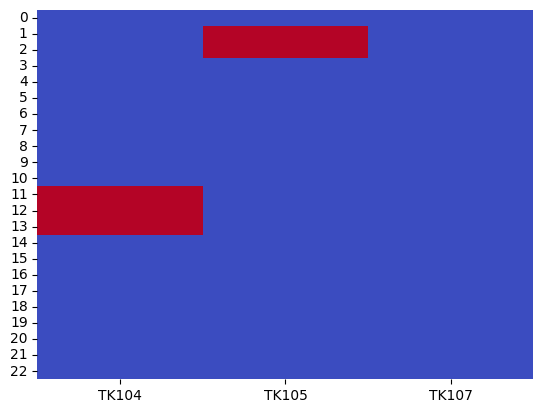

In [47]:
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False)
plt.show()

### Method 1: Dropping Missing Values

In [48]:
df_drop = df.copy()
df_drop.dropna(axis=0, inplace=True)

In [49]:
df_drop.reset_index(inplace=True, drop=True)
df_drop

,TK104,TK105,TK107
0,254.00,263.00,338
1,368.00,451.00,426
2,697.00,709.00,733
3,476.00,542.00,539
4,188.00,223.00,240
5,525.00,659.00,628
6,451.00,689.00,517
7,517.00,509.00,564
8,370.00,321.00,435
9,396.00,492.00,429


### Method 2: Fill with a Specific Value

In [50]:
df_fill = df.copy()
df_fill.fillna(df_fill.median(), inplace=True)

In [51]:
df_fill

,TK104,TK105,TK107
0,254.00,263.00,338
1,440.00,460.00,470
2,501.00,460.00,558
3,368.00,451.00,426
4,697.00,709.00,733
5,476.00,542.00,539
6,188.00,223.00,240
7,525.00,659.00,628
8,451.00,689.00,517
9,517.00,509.00,564


In [52]:
df_fill.median()

,0
TK104,423.50
TK105,460.00
TK107,479.00


### Method 3: Backward of Forward fill

In [54]:
df

,TK104,TK105,TK107
0,254.00,263.00,338
1,440.00,NaN,470
2,501.00,NaN,558
3,368.00,451.00,426
4,697.00,709.00,733
5,476.00,542.00,539
6,188.00,223.00,240
7,525.00,659.00,628
8,451.00,689.00,517
9,517.00,509.00,564


In [55]:
df_fb = df.copy()
df_fb.ffill(inplace=True)
df_fb

,TK104,TK105,TK107
0,254.00,263.00,338
1,440.00,263.00,470
2,501.00,263.00,558
3,368.00,451.00,426
4,697.00,709.00,733
5,476.00,542.00,539
6,188.00,223.00,240
7,525.00,659.00,628
8,451.00,689.00,517
9,517.00,509.00,564


### Method 4: Sklearn Library Module Imputer

In [56]:
from sklearn.impute import SimpleImputer

df_si = df.copy()

imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(df_si)

df_si = pd.DataFrame(x, columns=df_si.columns)
df_si

,TK104,TK105,TK107
0,254.00,263.00,338.00
1,440.00,472.19,470.00
2,501.00,472.19,558.00
3,368.00,451.00,426.00
4,697.00,709.00,733.00
5,476.00,542.00,539.00
6,188.00,223.00,240.00
7,525.00,659.00,628.00
8,451.00,689.00,517.00
9,517.00,509.00,564.00


In [57]:
df_si = df.copy()

imputer = SimpleImputer(strategy='median')
x = imputer.fit_transform(df_si)

df_si = pd.DataFrame(x, columns=df_si.columns)
df_si

,TK104,TK105,TK107
0,254.00,263.00,338.00
1,440.00,460.00,470.00
2,501.00,460.00,558.00
3,368.00,451.00,426.00
4,697.00,709.00,733.00
5,476.00,542.00,539.00
6,188.00,223.00,240.00
7,525.00,659.00,628.00
8,451.00,689.00,517.00
9,517.00,509.00,564.00


In [58]:
df_si = df.copy()

imputer = SimpleImputer(strategy='constant', fill_value=0)
x = imputer.fit_transform(df_si)

df_si = pd.DataFrame(x, columns=df_si.columns)
df_si

,TK104,TK105,TK107
0,254.00,263.00,338.00
1,440.00,0.00,470.00
2,501.00,0.00,558.00
3,368.00,451.00,426.00
4,697.00,709.00,733.00
5,476.00,542.00,539.00
6,188.00,223.00,240.00
7,525.00,659.00,628.00
8,451.00,689.00,517.00
9,517.00,509.00,564.00


In [59]:
from sklearn.impute import KNNImputer

df_knn = df.copy()

imputer = KNNImputer(n_neighbors=3)
x = imputer.fit_transform(df_knn)

df_knn = pd.DataFrame(x, columns=df_knn.columns)
df_knn

,TK104,TK105,TK107
0,254.00,263.00,338.00
1,440.00,432.33,470.00
2,501.00,580.33,558.00
3,368.00,451.00,426.00
4,697.00,709.00,733.00
5,476.00,542.00,539.00
6,188.00,223.00,240.00
7,525.00,659.00,628.00
8,451.00,689.00,517.00
9,517.00,509.00,564.00


In [60]:
df_outlier = df.copy()
df_outlier

,TK104,TK105,TK107
0,254.00,263.00,338
1,440.00,NaN,470
2,501.00,NaN,558
3,368.00,451.00,426
4,697.00,709.00,733
5,476.00,542.00,539
6,188.00,223.00,240
7,525.00,659.00,628
8,451.00,689.00,517
9,517.00,509.00,564


In [61]:
df_outlier.columns

Index(['TK104', 'TK105', 'TK107'], dtype='object')

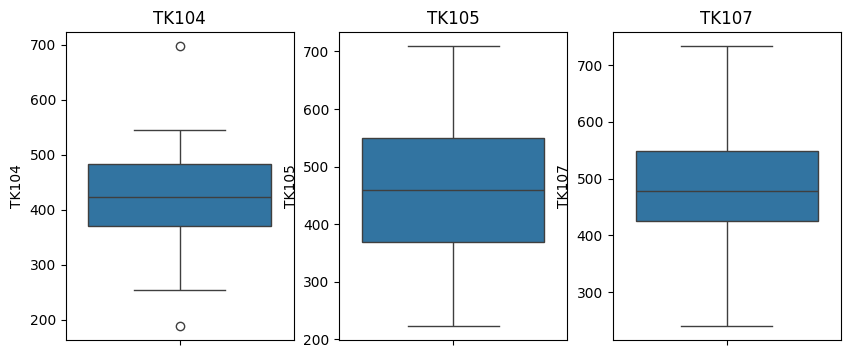

In [64]:
plt.figure(figsize=(10, 4))

for i in range(len(df_outlier.columns)):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y = df_outlier.columns[i], data=df_outlier)
    plt.title(df_outlier.columns[i])
plt.show()

In [66]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x = scaler.fit_transform(df_outlier)

df_outlier = pd.DataFrame(x, columns=df_outlier.columns)

knn_imputer = KNNImputer(n_neighbors=3)
x = knn_imputer.fit_transform(df_outlier)

df_outlier = pd.DataFrame(x, columns=df_outlier.columns)
df_outlier

,TK104,TK105,TK107
0,-1.50,-1.10,-1.14
1,0.15,-0.15,-0.07
2,0.69,0.67,0.64
3,-0.49,-0.05,-0.43
4,2.43,1.39,2.06
5,0.47,0.46,0.49
6,-2.09,-1.32,-1.94
7,0.90,1.11,1.21
8,0.24,1.28,0.31
9,0.83,0.27,0.69


In [67]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

df_iter = df.copy()

for column in df_iter.columns:
  Q1 = df_iter[column].quantile(.25)
  Q3 = df_iter[column].quantile(.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * 3
  upper_bound = Q3 + 1.5 * 3

  df_iter[column] = np.where(df_iter[column] < lower_bound, lower_bound, df_iter[column])
  df_iter[column] = np.where(df_iter[column] > upper_bound, upper_bound, df_iter[column])

scaler = StandardScaler()
data_to_impute = scaler.fit_transform(df_iter)

imputer = IterativeImputer(max_iter=10, random_state=0)
data_imputed = imputer.fit_transform(data_to_impute)

df_iter = pd.DataFrame(scaler.inverse_transform(data_imputed), columns=df_iter.columns)
df_iter

,TK104,TK105,TK107
0,365.00,365.50,420.50
1,440.00,570.60,470.00
2,486.75,553.04,553.00
3,368.00,451.00,426.00
4,486.75,553.50,553.00
5,476.00,542.00,539.00
6,365.00,365.50,420.50
7,486.75,553.50,553.00
8,451.00,553.50,517.00
9,486.75,509.00,553.00
